### load library

In [13]:
suppressMessages(library(ORFik))

In [3]:
organism <- 'Homo sapiens'

### load genome file and gtf file

In [31]:
annotation <- getGenomeAndAnnotation(organism,
                                             output.dir = "/Users/mayanksinghsikarwar/Documents/MB6303/test_folder",
                                             db = "ensembl",
                                             GTF = FALSE,
                                             genome = FALSE)

annotation["genome"] <- readline(prompt="Path to genome file: ")
annotation["gtf"] <- readline(prompt="Path to annotation file: ")

Loading premade Genome files,
            do remake = TRUE if you want to run again



Path to genome file:  /Users/mayanksinghsikarwar/Documents/MB6303/GRCh38.primary_assembly.genome.fa
Path to annotation file:  /Users/mayanksinghsikarwar/Documents/MB6303/gencode.v35.annotation.gtf


In [32]:
gtf <- annotation["gtf"]
gtf
fa <- annotation["genome"]
fa

gtf 
"/Users/mayanksinghsikarwar/Documents/MB6303/gencode.v35.annotation.gtf"

genome 
"/Users/mayanksinghsikarwar/Documents/MB6303/GRCh38.primary_assembly.genome.fa"

In [ ]:
#"/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/Human_WBC_rpfAligned.out.bam"

### create experiment

In [6]:
create.experiment("/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/",
                  "Ribo-seq",
                  fa = fa,
                  txdb = gtf,
                  saveDir = "/Users/mayanksinghsikarwar/Documents/MB6303/ORFik_experiments/",
                  organism = organism,
                  pairedEndBam = FALSE,
                  viewTemplate = FALSE,
                  types = c("bam", "bed", "wig"),
                  libtype = "Riboseq",
                  stage = "Prefrontal_cortex",
                  rep = "1",
                  condition = "Normal",
                  fraction = "auto")

X1,X2,X3,X4,X5,X6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
name,Ribo-seq,,,,
gff,/Users/mayanksinghsikarwar/Documents/MB6303/GRCh38.primary_assembly.genome.fa,,,organism,Homo sapiens
fasta,/Users/mayanksinghsikarwar/Documents/MB6303/gencode.v35.annotation.gtf,,,,
libtype,stage,rep,condition,fraction,filepath
Riboseq,Prefrontal_cortex,1,Normal,,/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/Human_WBC_rpfAligned.out.bam


In [7]:
Riboseq.df <- read.experiment("Ribo-seq","/Users/mayanksinghsikarwar/Documents/MB6303/ORFik_experiments/")

In [8]:
cagebam <- file.path("/Users/mayanksinghsikarwar/Documents/MB6303/processed_data/CAGE/Felix_et_al/1739_run1_Aligned.sortedByCoord.out.bam")
cagebam

[1] "/Users/mayanksinghsikarwar/Documents/MB6303/processed_data/CAGE/Felix_et_al/1739_run1_Aligned.sortedByCoord.out.bam"

In [9]:
    create.experiment(
      dir = dirname(bam),
      exper = "felix",
      saveDir = "/Users/mayanksinghsikarwar/Documents/MB6303/ORFik_experiments/",
      txdb = annotation["gtf"],
      fa = fa,
      organism = organism,
      pairedEndBam = FALSE,
      viewTemplate = FALSE,
      types = c("bam", "bed", "wig"),
      libtype = "CAGE",
      stage = "Prefrontal_cortex",
      rep = "1",
      condition = "Normal",
      fraction = "auto"
        )

X1,X2,X3,X4,X5,X6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
name,felix,,,,
gff,/Users/mayanksinghsikarwar/Documents/MB6303/GRCh38.primary_assembly.genome.fa,,,organism,Homo sapiens
fasta,/Users/mayanksinghsikarwar/Documents/MB6303/gencode.v35.annotation.gtf,,,,
libtype,stage,rep,condition,fraction,filepath
CAGE,Prefrontal_cortex,1,Normal,,/Users/mayanksinghsikarwar/Documents/MB6303/processed_data/CAGE/Felix_et_al/1739_run1_Aligned.sortedByCoord.out.bam


In [10]:
CAGEseq.df <- read.experiment("felix","/Users/mayanksinghsikarwar/Documents/MB6303/ORFik_experiments/")

### Run QC command 

In [11]:
ORFikQC(Riboseq.df)

Started ORFik QC report:

Warning message in dir.create(stats_folder, recursive = TRUE):
“'/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/QC_STATS' already exists”
- Converting input files to .ofst

Saving, ofst files to: /Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/ofst/

Outputting libraries from: Ribo-seq

1 :  Riboseq

--------------------------

Converting to new format:

Riboseq

- Creating read length tables:



ERROR: Error in loadTxdb(df): when txdb is path, must be one of .gff, .gtf and .db


In [12]:
RiboQC.plot(Riboseq.df, 
          output.dir = "/Users/mayanksinghsikarwar/Documents/MB6303/TSS_plots",
          width = 6.6,
          height = 4.5,
          type = "normal",
          weight = "score",
          BPPARAM = BiocParallel::SerialParam(progressbar = TRUE))

Warning message in melt.data.table(stats, id.vars = c("Sample", "sample_id")):
“'measure.vars' [Raw_reads, Trimmed_reads, Aligned_reads, %_aligned_raw, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”


ERROR: Error in loadTxdb(txdb): when txdb is path, must be one of .gff, .gtf and .db


In [33]:
class(Riboseq.df)

[1] "experiment"
attr(,"package")
[1] "ORFik"

### read aligned file

In [34]:
footprints<-readBam("/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/Human_WBC_rpfAligned.out.bam")

In [35]:
table(readWidths(footprints))


  20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35 
  48   67   69   97  161  439 1653 5086 8990 9718 3379  554  112   26    5    3 

In [44]:
gtf_db_as_txdb <- loadTxdb(gtf , chrStyle = "UCSC")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK



In [46]:
create.experiment("/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/",
                  "Ribo-seq",
                  fa = fa,
                  txdb = gtf,
                  saveDir = "/Users/mayanksinghsikarwar/Documents/MB6303/ORFik_experiments/",
                  organism = organism,
                  pairedEndBam = FALSE,
                  viewTemplate = FALSE,
                  types = c("bam", "bed", "wig"),
                  libtype = "Riboseq",
                  stage = "Prefrontal_cortex",
                  rep = "1",
                  condition = "Normal",
                  fraction = "auto")

X1,X2,X3,X4,X5,X6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
name,Ribo-seq,,,,
gff,/Users/mayanksinghsikarwar/Documents/MB6303/gencode.v35.annotation.gtf,,,organism,Homo sapiens
fasta,/Users/mayanksinghsikarwar/Documents/MB6303/GRCh38.primary_assembly.genome.fa,,,,
libtype,stage,rep,condition,fraction,filepath
Riboseq,Prefrontal_cortex,1,Normal,,/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/Human_WBC_rpfAligned.out.bam


In [47]:
Riboseq.df <- read.experiment("Ribo-seq","/Users/mayanksinghsikarwar/Documents/MB6303/ORFik_experiments/")

### generate heatmap directly using ORFIk experiment

Plot save location:
/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/QC_STATS/heatmaps/pre-pshift/

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK

TIS



[1] "Riboseq 5prime transcriptNormalized"
[1] "Riboseq 5prime sum"


TTS



[1] "Riboseq 5prime transcriptNormalized"
[1] "Riboseq 5prime sum"


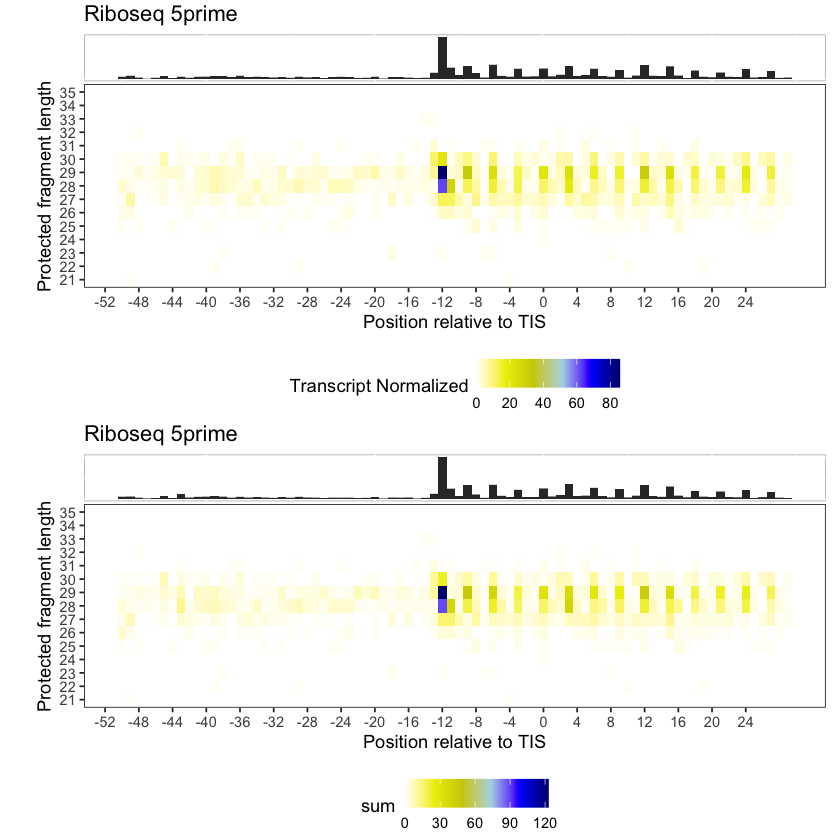

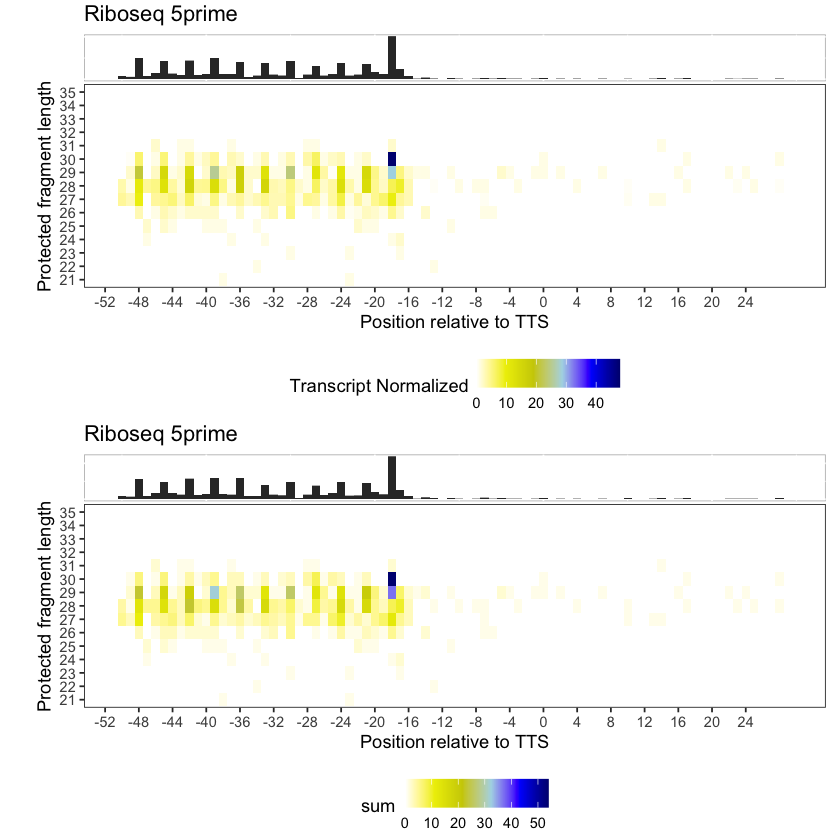

In [48]:
#pre-shifting
heatMapRegion(Riboseq.df, 
              region = c("TIS","TTS"), 
              shifting = "5prime", 
              type ="ofst", 
              outdir = file.path("/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data", "QC_STATS/heatmaps/pre-pshift/")
             )

In [52]:
shiftFootprintsByExperiment(Riboseq.df, accepted.lengths = c(25:26,29:30))

Saving ofst files to: /Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/pshifted/

Saving wig files to: /Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/pshifted/

Shifting reads in experiment: Ribo-seq

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK

/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/ofst/Human_WBC_rpfAligned.out.ofst

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK

Sorting shifted footprint

Removed loaded libraries from experiment:Ribo-seq

Plot save location:
/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/QC_STATS/heatmaps/post-pshift/

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK

TIS

Outputting libraries from: Ribo-seq

1 :  Riboseq



[1] "Riboseq 5prime transcriptNormalized"
[1] "Riboseq 5prime sum"


TTS



[1] "Riboseq 5prime transcriptNormalized"
[1] "Riboseq 5prime sum"


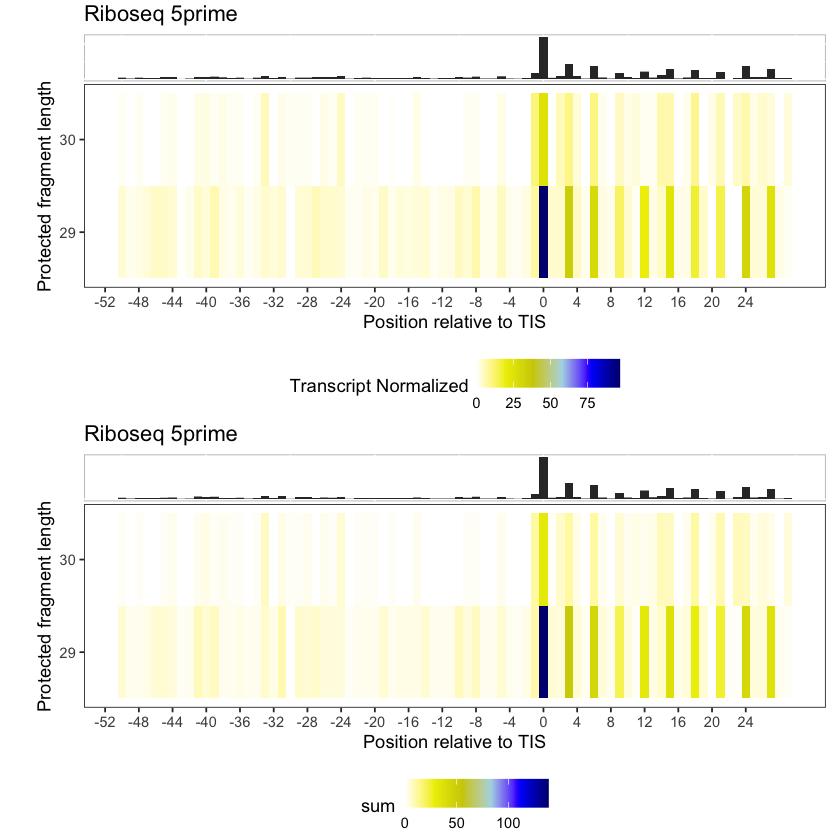

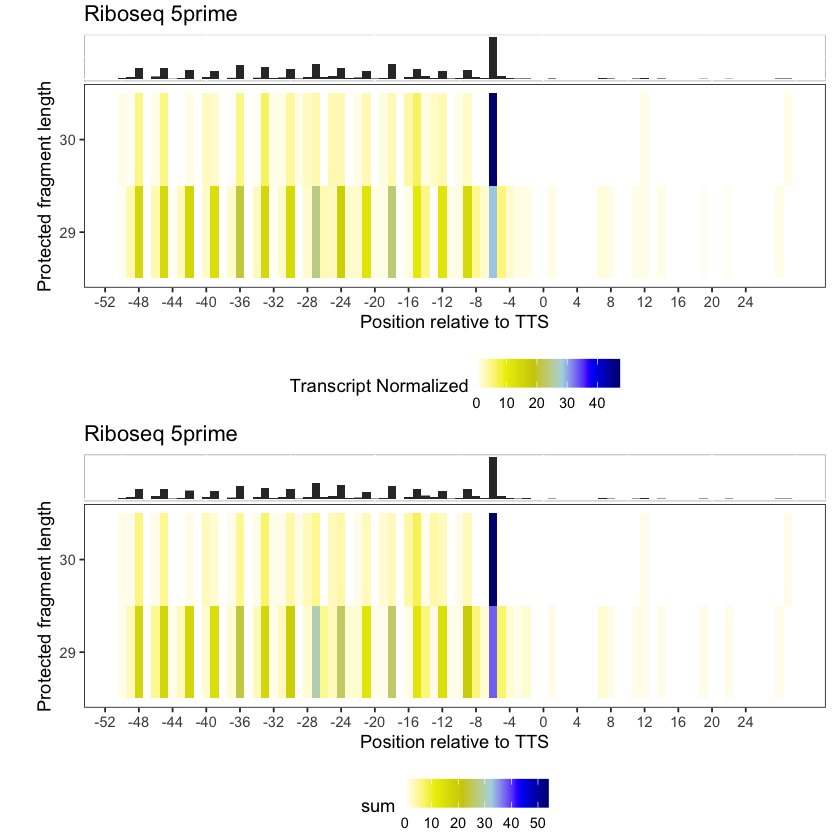

In [55]:
remove.experiments(Riboseq.df)
heatMapRegion(Riboseq.df, 
              region = c("TIS","TTS"), 
              shifting = "5prime", 
              type ="pshifted", 
              outdir = file.path("/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data", "QC_STATS/heatmaps/post-pshift/")
             )

### read alinged file as GRanges object and generate p-site plot

In [56]:
footprints<-readBam("/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/Human_WBC_rpfAligned.out.bam")

In [57]:
footprintsGR <- convertToOneBasedRanges(footprints, addSizeColumn = TRUE)
footprintsGR

GRanges object with 30407 ranges and 1 metadata column:
            seqnames    ranges strand |      size
               <Rle> <IRanges>  <Rle> | <integer>
      [1]       chr1    629931      + |        29
      [2]       chr1    634002      + |        28
      [3]       chr1    945566      - |        27
      [4]       chr1    945632      - |        30
      [5]       chr1    951226      - |        28
      ...        ...       ...    ... .       ...
  [30403]       chrM     15956      + |        30
  [30404]       chrM     16001      - |        28
  [30405]       chrM     16003      - |        27
  [30406]       chrM     16022      - |        29
  [30407] KI270442.1    219053      - |        29
  -------
  seqinfo: 194 sequences from an unspecified genome

In [58]:
footprints <- footprints[readWidths(footprints) == 29]
footprintsGR <- footprintsGR[readWidths(footprintsGR) == 29]
footprints

GAlignments object with 9718 alignments and 0 metadata columns:
           seqnames strand       cigar    qwidth     start       end     width
              <Rle>  <Rle> <character> <integer> <integer> <integer> <integer>
     [1]       chr1      +         29M        29    629931    629959        29
     [2]       chr1      -         29M        29   1223261   1223289        29
     [3]       chr1      -         29M        29   1223939   1223967        29
     [4]       chr1      -         29M        29   1255109   1255137        29
     [5]       chr1      -  17M186N12M        29   1302959   1303173       215
     ...        ...    ...         ...       ...       ...       ...       ...
  [9714]       chrM      +         29M        29     15560     15588        29
  [9715]       chrM      +         29M        29     15749     15777        29
  [9716]       chrM      +         29M        29     15790     15818        29
  [9717]       chrM      -         29M        29     15994     1602

In [69]:
loadRegions(gtf_db_as_txdb, parts = c("leaders", "cds", "trailers"))

In [64]:
txNames <- filterTranscripts(gtf_db_as_txdb) # <- get only transcripts that pass filter
tx <- tx[txNames]; cds <- cds[txNames]; trailers <- trailers[txNames];
windowsStart <- startRegion(cds, tx, TRUE, upstream = 30, 29)
windowsStop <- startRegion(trailers, tx, TRUE, upstream = 30, 29)
windowsStart

GRangesList object of length 18232:
$ENST00000373020.9
GRanges object with 1 range and 0 metadata columns:
                    seqnames              ranges strand
                       <Rle>           <IRanges>  <Rle>
  ENST00000373020.9     chrX 100636665-100636724      -
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

$ENST00000373031.5
GRanges object with 1 range and 0 metadata columns:
                    seqnames              ranges strand
                       <Rle>           <IRanges>  <Rle>
  ENST00000373031.5     chrX 100584989-100585048      +
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

$ENST00000371582.8
GRanges object with 1 range and 0 metadata columns:
                    seqnames            ranges strand
                       <Rle>         <IRanges>  <Rle>
  ENST00000371582.8    chr20 50958494-50958553      -
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

...
<18229 more elemen

In [65]:
hitMapStart <- metaWindow(footprintsGR, windowsStart, withFrames = TRUE, fraction = 29)
hitMapStop <- metaWindow(footprintsGR, windowsStop, withFrames = TRUE, fraction = 29)

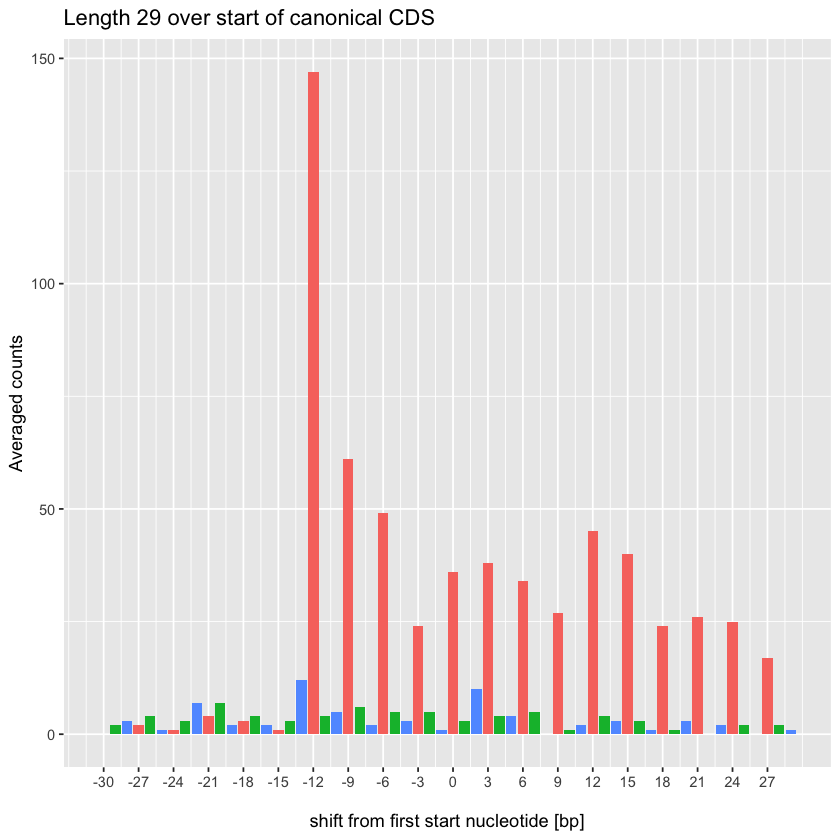

In [66]:
pSitePlot(hitMapStart)

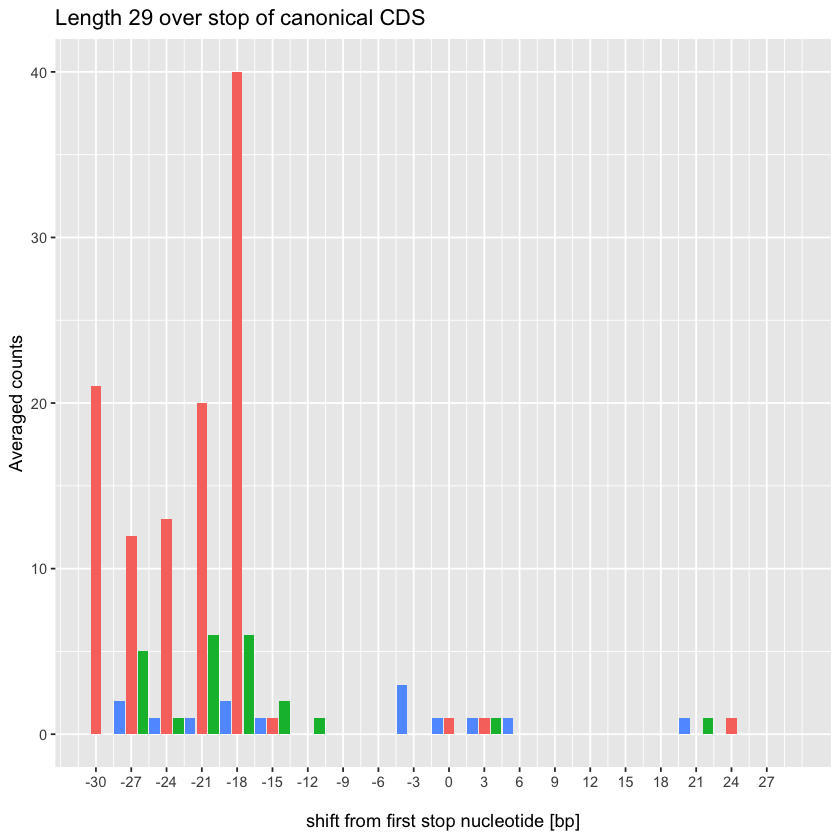

In [67]:
pSitePlot(hitMapStop, region = "stop")

### coverage plots

In [70]:
footprints<-readBam("/Users/mayanksinghsikarwar/Documents/MB6303/Ribo_seq_data/aligned/Human_WBC_rpfAligned.out.bam")
cagebam <- readBam("/Users/mayanksinghsikarwar/Documents/MB6303/processed_data/CAGE/Felix_et_al/1739_run1_Aligned.sortedByCoord.out.bam")

In [71]:
shiftedReads <- shiftFootprints(footprints, detectRibosomeShifts(footprints, gtf_db_as_txdb))  

Sorting shifted footprints...



In [73]:
# Create meta coverage per part of transcript
leaderCov <- metaWindow(shiftedReads, leaders, scoring = NULL, 
                        feature = "leaders")

cdsCov <- metaWindow(shiftedReads, cds, scoring = NULL, 
                     feature = "cds")

trailerCov <- metaWindow(shiftedReads, trailers, scoring = NULL, 
                         feature = "trailers")

In [74]:
# Create meta coverage per part of transcript
leaderCov_cage <- metaWindow(cagebam, leaders, scoring = NULL, 
                        feature = "leaders")

cdsCov_cage <- metaWindow(cagebam, cds, scoring = NULL, 
                     feature = "cds")

trailerCov_cage <- metaWindow(cagebam, trailers, scoring = NULL, 
                         feature = "trailers")

In [123]:
l_ribo = rbind2( cdsCov, trailerCov)

In [124]:
dt <- rbind2(leaderCov,l_ribo)
dt[, `:=` (fraction = "Ribo-seq")]

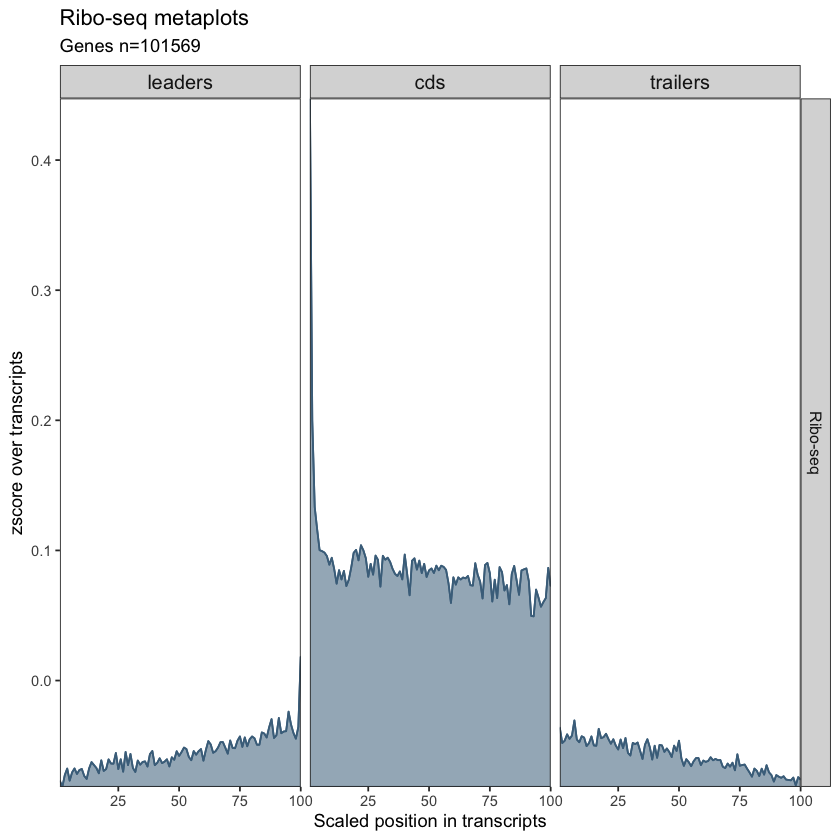

In [125]:
windowCoveragePlot(dt, scoring = "zscore", title = "Ribo-seq metaplots")

In [126]:
l_cage <- rbind2(cdsCov_cage, trailerCov_cage)
dt_cage <- rbind2(leaderCov_cage, l_cage)
dt_cage[, `:=` (fraction = "CAGE-seq")]

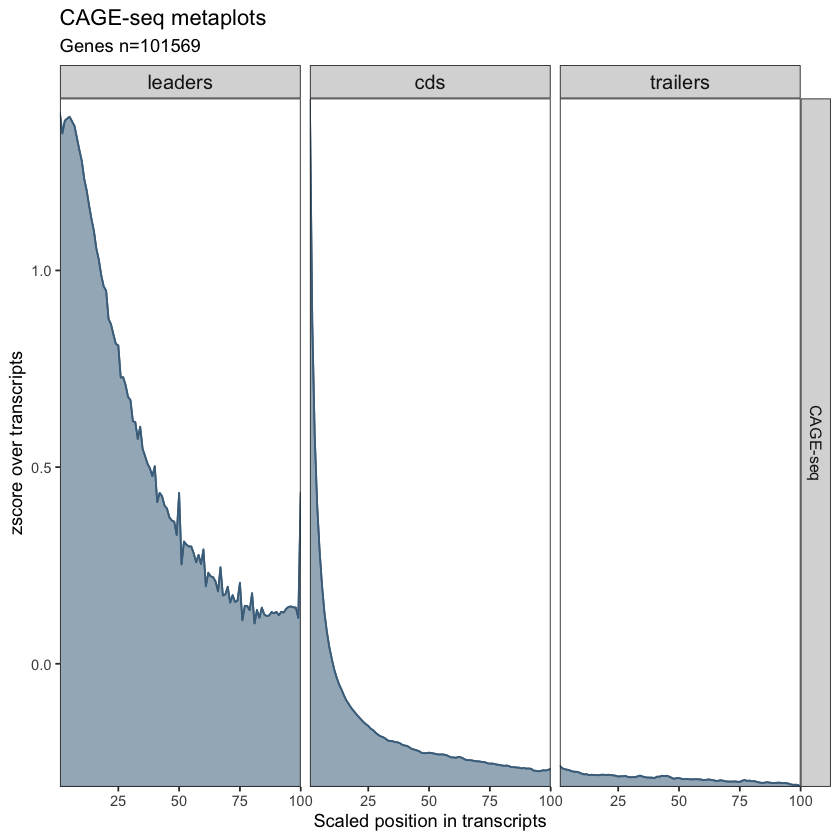

In [127]:
windowCoveragePlot(dt_cage, scoring = "zscore", title = "CAGE-seq metaplots")

In [128]:
dtc<-rbind2(dt,dt_cage)

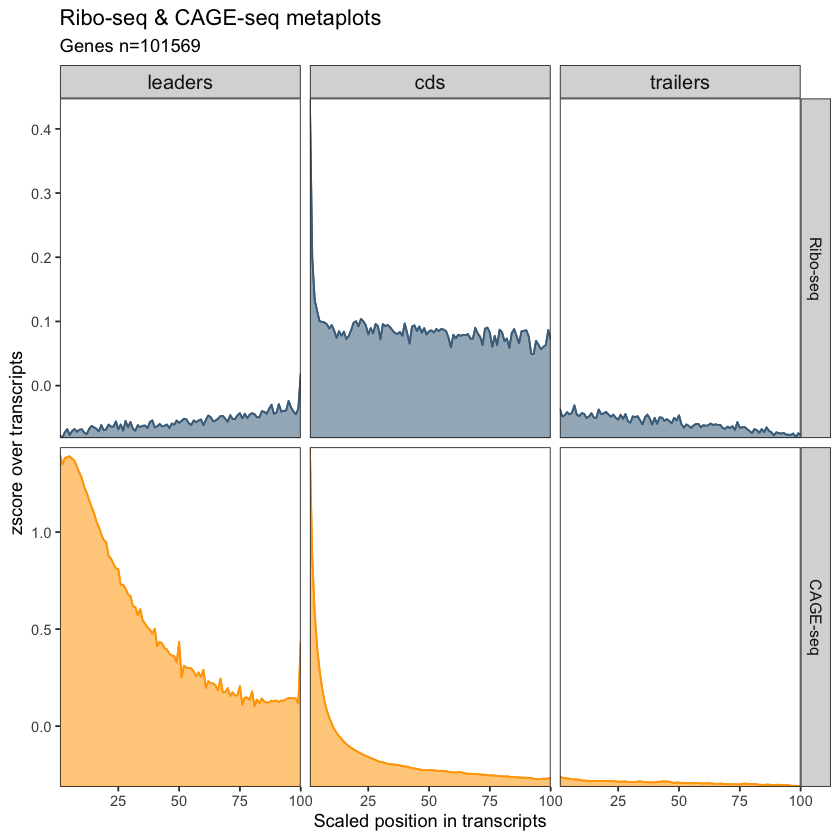

In [129]:
windowCoveragePlot(dtc, scoring = "zscore", title = "Ribo-seq & CAGE-seq metaplots")